In [ ]:
from google.colab import drive
drive.mount('/content/drive')

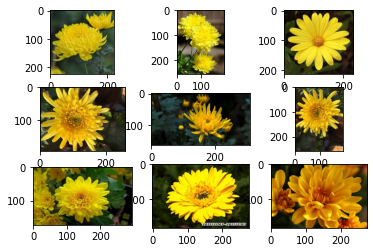

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Flower/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'hoa_cuc'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/Colab Notebooks/Train_AI/Flower/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoa_cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoa_mat_troi'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('Hoa_van_tho'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Flower.npy', photos)
save('Flower_labels.npy', labels)

(55, 200, 200, 3) (55,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
 history = model.fit(photos, labels, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 12s 483ms/step - loss: 1009.5715 - accuracy: 0.1273
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 1817.6224 - accuracy: 0.3091
Epoch 3/100
2/2 [==============================] - 0s 61ms/step - loss: 914.9869 - accuracy: 0.4545
Epoch 4/100
2/2 [==============================] - 0s 61ms/step - loss: 640.4420 - accuracy: 0.5636
Epoch 5/100
2/2 [==============================] - 0s 60ms/step - loss: 197.9576 - accuracy: 0.5273
Epoch 6/100
2/2 [==============================] - 0s 58ms/step - loss: 46.9508 - accuracy: 0.6545
Epoch 7/100
2/2 [==============================] - 0s 58ms/step - loss: 10.3369 - accuracy: 0.8545
Epoch 8/100
2/2 [==============================] - 0s 61ms/step - loss: 6.1529 - accuracy: 0.9091
Epoch 9/100
2/2 [==============================] - 0s 59ms/step - loss: 2.5866 - accuracy: 0.9818
Epoch 10/100
2/2 [==============================] - 0s 66ms/step - loss: 1.3663 - accuracy: 0.9636
Epo

In [7]:
model.evaluate(photos,labels)

2/2 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [8]:
model.save('Flower_Final.h5')

In [10]:
from keras.models import load_model
models=load_model('Flower_Final.h5')

In [11]:
classes = ["hoa_cuc","Hoa_mat_troi","thuoc_duoc","Hoa_van_tho"]

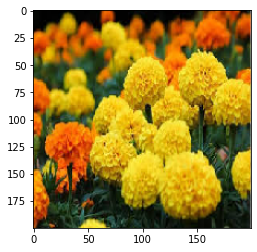

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('hoa_van_tho.jpg', target_size=(200,200))
plt.imshow(img)

In [13]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.1974425  0.09587509 0.10848957 0.34016627 0.01233348 0.03193707
  0.04316897 0.07090016 0.03543441 0.02958107 0.03467144]]


'Hoa_van_tho'